In [1]:
import yfinance as yf
import html5lib
import modin.pandas as pd
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
spdr_xlk = yf.Ticker('xlk')
print(spdr_xlk)

yfinance.Ticker object <XLK>


In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
spdr_xlk.info

{'previousClose': 82.31,
 'regularMarketOpen': 79.76,
 'twoHundredDayAverage': 87.73167,
 'trailingAnnualDividendYield': 0.009962338,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 81.255,
 'navPrice': 78.62,
 'averageDailyVolume10Day': 39040957,
 'totalAssets': 24922689536,
 'regularMarketPreviousClose': 82.31,
 'fiftyDayAverage': 88.11853,
 'trailingAnnualDividendRate': 0.82,
 'open': 79.76,
 'toCurrency': None,
 'averageVolume10days': 39040957,
 'expireDate': None,
 'yield': 0.012,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 78.25,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 29242721,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 20526398,
 'priceToSalesTrailing12Months': None,
 'dayLow': 78.25,
 'ask': 78.65,
 'ytdReturn': None,


In [5]:
xlk_df = spdr_xlk.history(period='max')
xlk_df.shape

(5350, 7)

In [6]:
xlk_df.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-23,70.69,72.22,68.10,70.40,42479200,0.371,0
2020-03-24,74.66,77.67,74.36,77.61,37664500,0.000,0
2020-03-25,78.20,81.09,76.02,77.51,28740400,0.000,0
2020-03-26,78.49,82.51,78.30,82.31,28212900,0.000,0
2020-03-27,79.76,81.26,78.25,78.59,29240600,0.000,0


In [7]:
xlk_df = pd.DataFrame({'ds':xlk_df.index
                       , 'y': xlk_df.Close
                      }).reset_index(drop=True)._to_pandas()

In [8]:
xlk_df.head()

,ds,y
0,1998-12-22,25.01
1,1998-12-23,25.61
2,1998-12-24,25.51
3,1998-12-28,25.58
4,1998-12-29,25.65


In [9]:
from fbprophet import Prophet

In [10]:
xlk_model = Prophet(interval_width = 0.95)
xlk_model.fit(xlk_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
xlk_forecast = xlk_model.make_future_dataframe(periods=20
                                               , freq='D'
                                              )
xlk_forecast = xlk_model.predict(xlk_forecast)

In [12]:
xlk_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

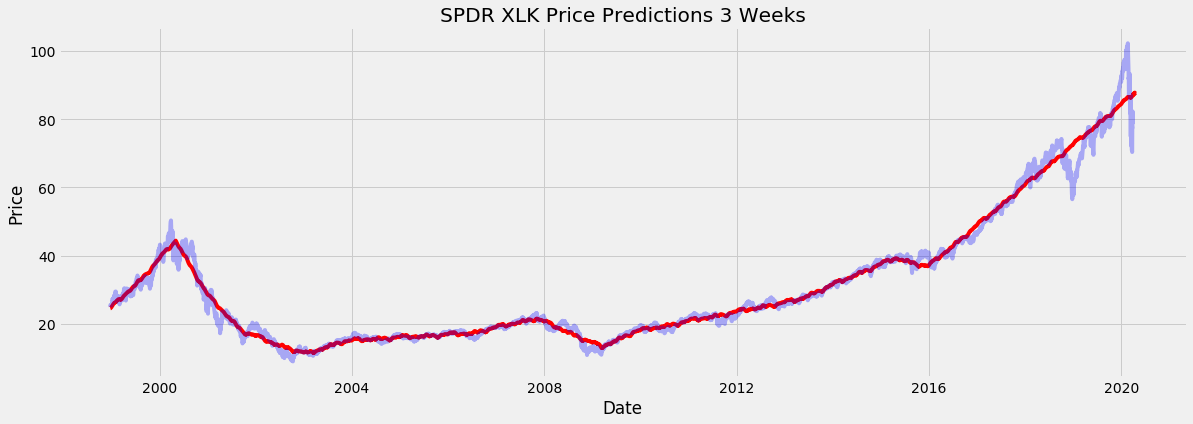

In [13]:
plt.figure(figsize=(18,6))
plt.plot(xlk_forecast.ds
         , xlk_forecast.yhat
         , 'r-'
        )
plt.plot(xlk_df.ds
         , xlk_df.y
         , 'b-'
         , alpha=0.3
        )
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPDR XLK Price Predictions 3 Weeks');